In [1]:
import sys
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
d, info = matlab.loaddata('../../mat/strategy_270225.mat')


In [4]:
info

{'legs': 4,
 'margin': 3850,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

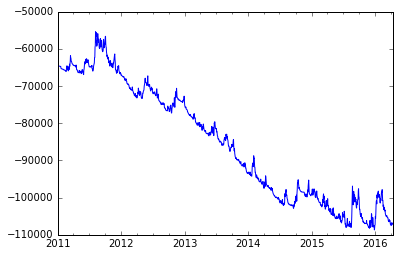

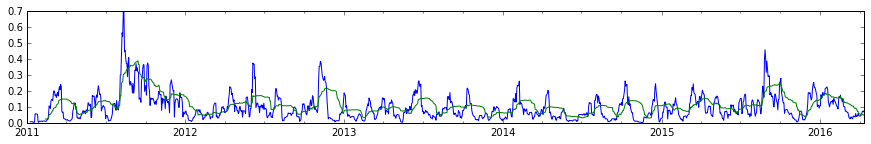

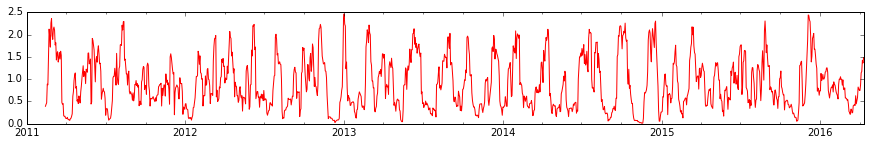

In [5]:
O = L = H = C = d.exo
period = 15

#atr = ATR(H, L, C, period)
#print(type(d))
#df = pd.rolling_std(d.exo,10)
#print(d.exo[0:50])

pctChg = d.exo.pct_change()
#print(pctChg)
#df = pctChg.rolling(center=False,window=5).std() * numpy.sqrt(252) / \
#    pctChg.rolling(center=False,window=30).std() * numpy.sqrt(252)

fastVolComp = pctChg.rolling(center=False,window=5).std() * numpy.sqrt(252)
slowVolComp = pctChg.rolling(center=False,window=30).std() * numpy.sqrt(252)

volComp = fastVolComp / slowVolComp

#print(df)
#print(d.exo[1:5])

#std = np.mean(d.exo[1:5])

#print(std)

plt.figure()
figsize(15,2)
d.exo.plot(c='b')

plt.figure()
figsize(15,2)
fastVolComp.plot(c='b')
slowVolComp.plot(c='g')

plt.figure()

figsize(15,2)
volComp.plot(c='r')



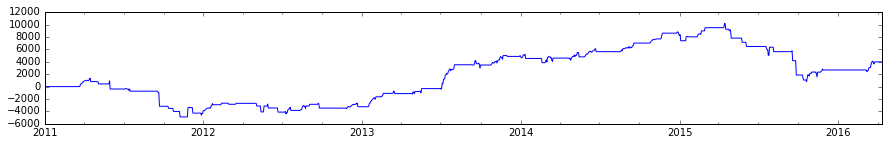

In [7]:
#print(type(fastVolComp))

crossVal = fastVolComp.copy()

crossVal[:] = 0.5
#print(crossVal)


short_entry = CrossDown(volComp, crossVal)
short_exit = CrossUp(volComp, crossVal)

direction = -1
pl, inposition = backtester.backtest(d, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

equity.plot()